# **dependency** 



In [ ]:
#dependency
!pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 18.4 MB/s 
     |████████████████████████████████| 749 kB 42.8 MB/s 
     |████████████████████████████████| 1.0 MB 50.8 MB/s 
     |████████████████████████████████| 95 kB 4.4 MB/s 
     |████████████████████████████████| 943 kB 39.8 MB/s 
     |████████████████████████████████| 366 kB 57.0 MB/s 
     |████████████████████████████████| 1.1 MB 66.6 MB/s 
     |████████████████████████████████| 133 kB 65.2 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.1 MB 43.5 MB/s 
     |████████████████████████████████| 965 kB 48.8 MB/s 
     |████████████████████████████████| 1.5 MB 56.1 MB/s 
     |████████████████████

# **Libraries**

In [ ]:
#library

In [ ]:
# Library 
import pandas as pd 
import numpy as np 
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
data=pd.read_csv('/content/sample_data/marketing_campaign.csv', sep='\t')


In [ ]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# data plotting intitally


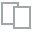
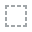
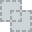
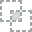
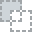
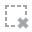
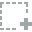
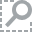
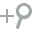
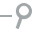
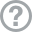
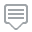
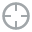
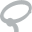
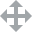
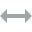
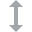
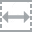
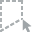
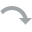
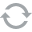
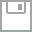
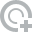
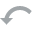
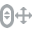
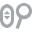
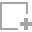
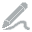
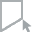
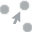
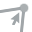
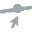

In [ ]:
plot(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data = data.dropna()

In [ ]:
# Date time
data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"])

# datetime operations:
newest_date=max(data["Dt_Customer"])

# time passed compare with the dt_customer
data["Dt_pass"]=newest_date-data["Dt_Customer"]
data["Dt_pass"]=pd.to_numeric(data["Dt_pass"].dt.days)

# Feature Engineering

In [ ]:
#  Feature Engineering
#Age of customer today 
data["Age"] = 2022-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response  Dt_pass  Age  Spent  \
0   172      88  ...             0         0         1      971   65   1617   
1     2       1  ...             0         0         0      125   68     27   
2   111      21  ...             0         0         0      472   57    776   
3    10       3  ...             0         0         0       65   38     53   
4    46      27  ...             0         0         0      321   41    422   

   Living_With  Children  Family_Size  Is_Parent  
0        Alone         0            1          0  
1        Alone         2            3          1  
2      Partner         0            2          0  
3      Partner         1            3          1  
4      Partner         1            3          1  

[5 rows x 30 columns]

# plotting after NA


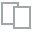
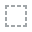
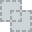
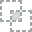
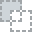
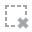
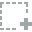
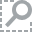
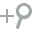
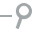
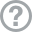
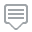
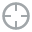
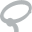
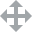
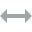
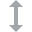
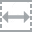
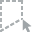
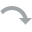
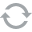
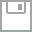
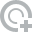
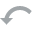
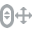
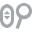
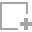
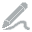
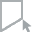
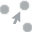
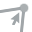
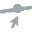

In [ ]:
plot(data)

# Scaling and correlation matrix

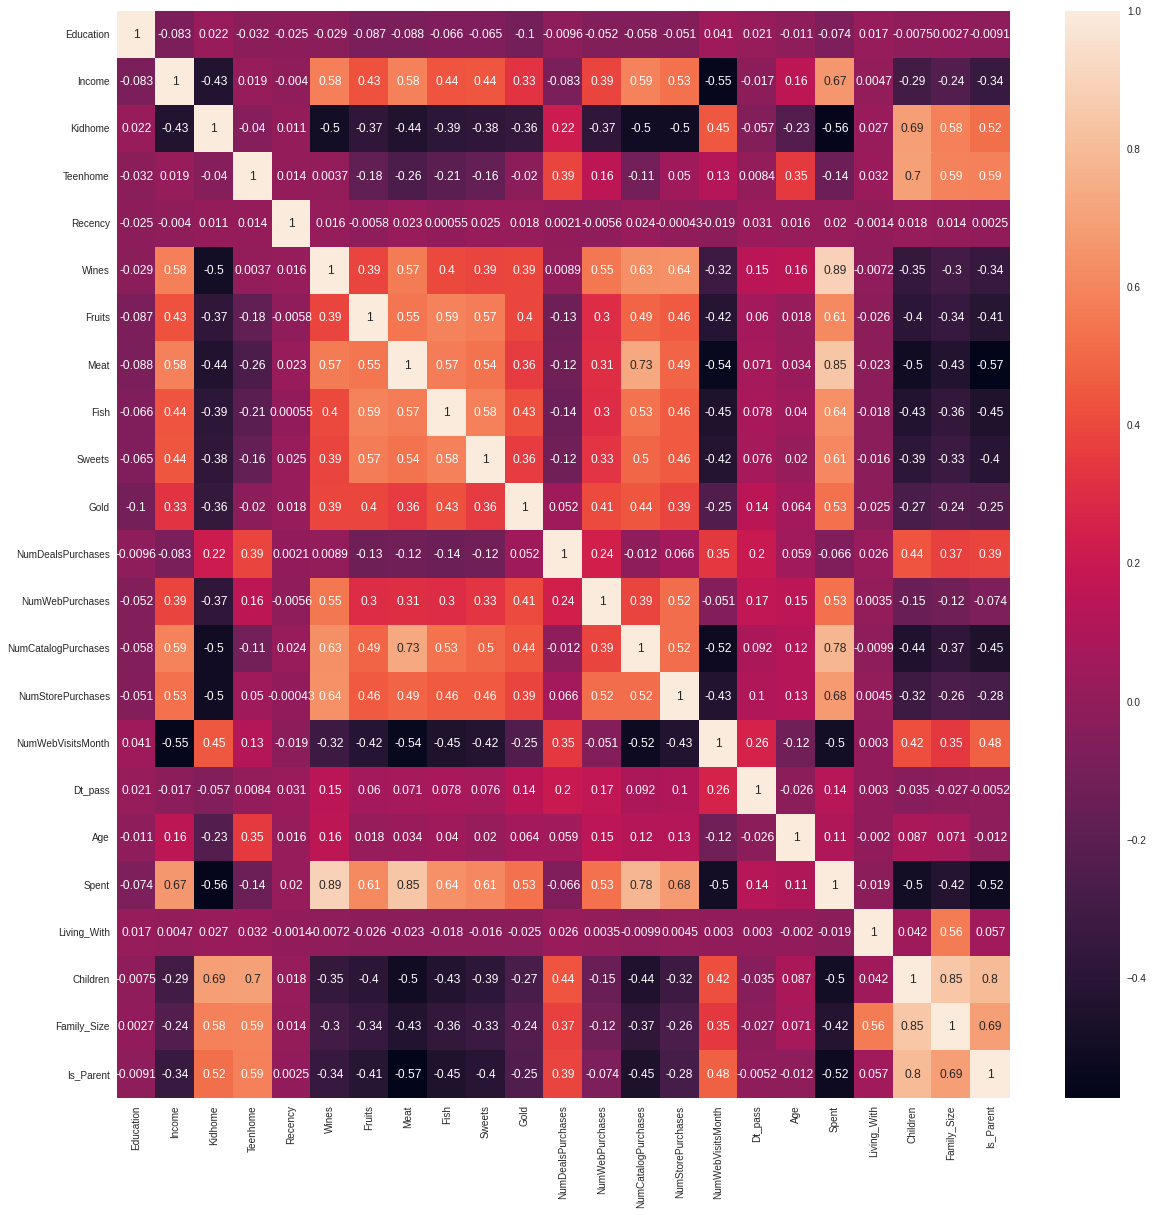

In [ ]:
# Name of categorical col
categorical_cols=list(data.dtypes[data.dtypes==object].index)



# Encode the categorical data 
Encoder=LabelEncoder()
for col in categorical_cols:
    # df[[col]] retrun df 
    data[[col]]=data[[col]].apply(Encoder.fit_transform)



data.head()
ds = data.copy()





# Split the x and y
y=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds=ds.drop(y,axis=1)





# Scaling
Scaler= StandardScaler()
Scaler.fit(ds)
scaled_ds=pd.DataFrame(Scaler.transform(ds),columns=ds.columns)





corr_1=scaled_ds.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_1,annot=True)

# Colilinearity 

In [ ]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.894187  0.234063 -0.823039 -0.928972  0.310532  0.978226  1.549429   
1  -0.894187 -0.234559  1.039938  0.909066 -0.380509 -0.872024 -0.637328   
2  -0.894187  0.769478 -0.823039 -0.928972 -0.795134  0.358511  0.569159   
3  -0.894187 -1.017239  1.039938 -0.928972 -0.795134 -0.872024 -0.561922   
4   0.569268  0.240221  1.039938 -0.928972  1.554407 -0.391671  0.418348   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690227  2.454568  1.484827  ...             2.504712          -0.554143   
1 -0.717986 -0.651038 -0.633880  ...            -0.571082          -1.169518   
2 -0.178368  1.340203 -0.146821  ...            -0.229327           1.291982   
3 -0.655551 -0.504892 -0.585174  ...            -0.912837          -0.554143   
4 -0.218505  0.152766 -0.000703  ...             0.112428           0.061232   

   NumWebVisitsMonth   Dt_pass       Age     Spent  Living_With  Children  \
0           0.693232  1.974875  0.986443  1.675488    -1.348829 -1.264803   
1          -0.131574 -1.665141  1.236801 -0.962358    -1.348829  1.405806   
2          -0.543978 -0.172132  0.318822  0.280250     0.741384 -1.264803   
3           0.280829 -1.923298 -1.266777 -0.919224     0.741384  0.070501   
4          -0.131574 -0.821827 -1.016420 -0.307044     0.741384  0.070501   

   Family_Size  Is_Parent  
0    -1.758673  -1.581389  
1     0.450009   0.632356  
2    -0.654332  -1.581389  
3     0.450009   0.632356  
4     0.450009   0.632356  

[5 rows x 23 columns]

In [ ]:
# PCA reduce dimension
pca=PCA(n_components=3)
pca.fit(scaled_ds)
pca_ds=pd.DataFrame(pca.transform(scaled_ds),columns=(["col1","col2", "col3"]))

In [ ]:
pca_ds.describe()

col1          col2          col3
count  2.216000e+03  2.216000e+03  2.216000e+03
mean  -3.126260e-17 -3.887785e-17 -7.214446e-18
std    2.849804e+00  1.699090e+00  1.217972e+00
min   -5.872598e+00 -4.273952e+00 -4.718535e+00
25%   -2.488285e+00 -1.332870e+00 -8.287967e-01
50%   -7.934423e-01 -1.600593e-01 -1.519182e-02
75%    2.411769e+00  1.222526e+00  8.063709e-01
max    7.382222e+00  6.114410e+00  6.590479e+00

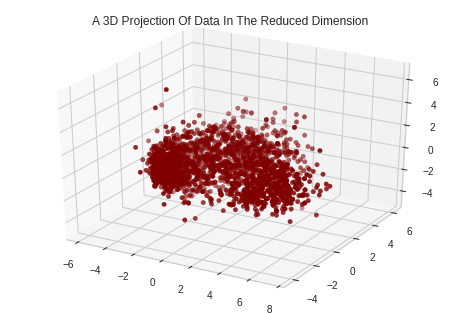

In [ ]:
# Visualization
x =pca_ds["col1"]
y =pca_ds["col2"]
z =pca_ds["col3"]
fig=plt.figure()
ax=plt.axes(projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# k clusters

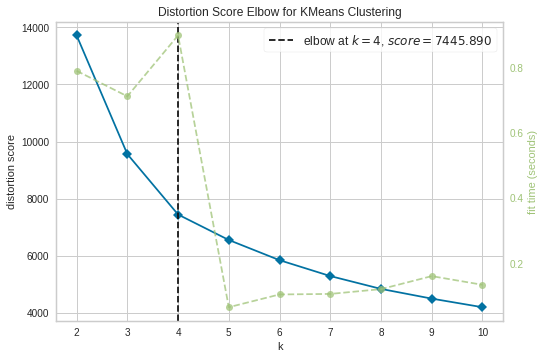

In [ ]:
# K means with elbow method library :
Auto_elbow=KElbowVisualizer(KMeans(),k=10)
Auto_elbow.fit(pca_ds)
Auto_elbow.show()

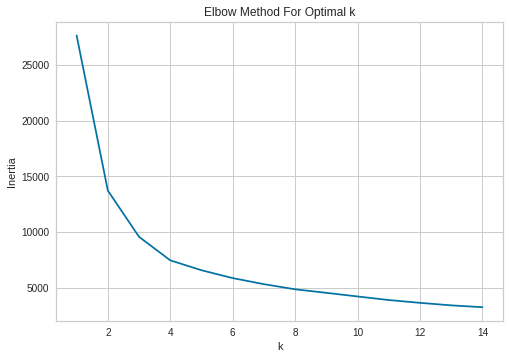

In [ ]:
inertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_ds)
    inertia.append(km.inertia_)
    
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# K Means
k=4
km=KMeans(n_clusters=k)
km=km.fit(pca_ds)
predictions=km.fit_predict(pca_ds)
pca_ds["cluster"]=predictions
data["cluster"]=predictions

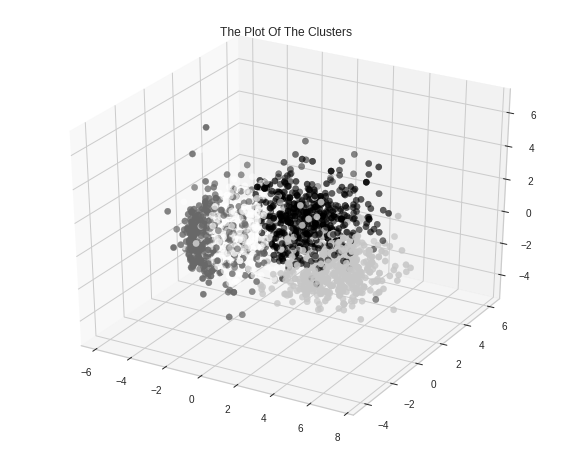

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes( projection='3d')
ax.scatter(x, y, z, s=40, c=pca_ds["cluster"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# apriori algorithm

Apriori Algorithm
Overview:

Fondation of basket analysis problem (Associate Rule)

Basket Analysis:
The goal is to find combinations of products that are often bought together, which we call frequent itemsets. The technical term for the domain is Frequent Itemset Mining.

Preprocess data to be put into apriori algo
Transfer the numeric to segementation data

In [ ]:
# Continuous data to categorical segment data
## Age -> Age group 
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 20, 45, 65, 90]
data['Age_group']=pd.cut(data["Age"],bins=cut_bins,labels=cut_labels_Age)

In [ ]:
## Income -> Income Group
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group']=pd.qcut(data["Income"],q=4,labels=cut_labels_Income)

In [ ]:
## Dt_pass -> Type of seniority  
cut_labels_Seniority = ['New customers', 'Repeat customers', 'Experienced customers', 'Old customers']
data['Seniority_group'] = pd.qcut(data['Dt_pass'], q=4, labels=cut_labels_Seniority)

In [ ]:
## Drop the continuous cols
data=data.drop(columns=['Age','Income','Dt_pass'])

In [ ]:
## Categorical Spending -> categorical spend group:
cut_labels = ['Low consumer', 'Frequent consumer', 'Fan consumer']
data['Wines_segment'] = pd.qcut(data['Wines'][data['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(data['Fruits'][data['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(data['Meat'][data['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(data['Fish'][data['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(data['Sweets'][data['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(data['Gold'][data['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")

data.replace(np.nan, "Non consumer",inplace=True)
data.drop(columns=['Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
data = data.astype(object)

In [ ]:
## Drop all irrelavent cols
y=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Spent']
data=data.drop(y,axis=1)

In [ ]:
# Aporior

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

association=data.copy() 
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

In [ ]:
product='Wines'
segment='Fan consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
13224                        (Meat_segment_Fan consumer, Income_group_High income)   
25160             (Kidhome_0, Meat_segment_Fan consumer, Income_group_High income)   
48116             (Meat_segment_Fan consumer, Income_group_High income, cluster_1)   
34052            (Meat_segment_Fan consumer, Teenhome_0, Income_group_High income)   
72255  (Kidhome_0, Meat_segment_Fan consumer, Income_group_High income, cluster_1)   

                        consequents  antecedent support  consequent support  \
13224  (Wines_segment_Fan consumer)               0.190               0.249   
25160  (Wines_segment_Fan consumer)               0.179               0.249   
48116  (Wines_segment_Fan consumer)               0.156               0.249   
34052  (Wines_segment_Fan consumer)               0.156               0.249   
72255  (Wines_segment_Fan consumer)               0.155               0.249   

       support  confidence  lift  leverage  conviction  
13224    0.119       0.626 2.518     0.072       2.010  
25160    0.111       0.620 2.492     0.066       1.975  
48116    0.097       0.618 2.487     0.058       1.969  
34052    0.096       0.617 2.483     0.057       1.964  
72255    0.096       0.616 2.479     0.057       1.958

In [ ]:
# More visulization
results_personnal_care.head(20)

antecedents  \
13224                                                   (Meat_segment_Fan consumer, Income_group_High income)   
25160                                        (Kidhome_0, Meat_segment_Fan consumer, Income_group_High income)   
48116                                        (Meat_segment_Fan consumer, Income_group_High income, cluster_1)   
34052                                       (Meat_segment_Fan consumer, Teenhome_0, Income_group_High income)   
72255                             (Kidhome_0, Meat_segment_Fan consumer, Income_group_High income, cluster_1)   
86886                            (Teenhome_0, Meat_segment_Fan consumer, Income_group_High income, cluster_1)   
93547                   (NumDealsPurchases_1, Meat_segment_Fan consumer, Income_group_High income, cluster_1)   
131770                (Meat_segment_Fan consumer, cluster_1, Income_group_High income, Children_0, Kidhome_0)   
69906                            (Children_0, Kidhome_0, Meat_segment_Fan consumer, Income_group_High income)   
171547   (Meat_segment_Fan consumer, cluster_1, Teenhome_0, Income_group_High income, Is_Parent_0, Kidhome_0)   
170918    (Meat_segment_Fan consumer, cluster_1, Teenhome_0, Income_group_High income, Children_0, Kidhome_0)   
170414  (Meat_segment_Fan consumer, Teenhome_0, Income_group_High income, Is_Parent_0, Children_0, Kidhome_0)   
117705                (Meat_segment_Fan consumer, cluster_1, Teenhome_0, Income_group_High income, Kidhome_0)   
131522              (Meat_segment_Fan consumer, Income_group_High income, Is_Parent_0, Children_0, Kidhome_0)   
44194                                       (Children_0, Meat_segment_Fan consumer, Income_group_High income)   
147652              (Meat_segment_Fan consumer, cluster_1, Teenhome_0, Income_group_High income, Is_Parent_0)   
132513               (Meat_segment_Fan consumer, cluster_1, Income_group_High income, Is_Parent_0, Kidhome_0)   
153759              (Meat_segment_Fan consumer, cluster_1, Income_group_High income, Is_Parent_0, Children_0)   
46940                                      (Meat_segment_Fan consumer, Is_Parent_0, Income_group_High income)   
146723             (Meat_segment_Fan consumer, Teenhome_0, Income_group_High income, Is_Parent_0, Children_0)   

                         consequents  antecedent support  consequent support  \
13224   (Wines_segment_Fan consumer)               0.190               0.249   
25160   (Wines_segment_Fan consumer)               0.179               0.249   
48116   (Wines_segment_Fan consumer)               0.156               0.249   
34052   (Wines_segment_Fan consumer)               0.156               0.249   
72255   (Wines_segment_Fan consumer)               0.155               0.249   
86886   (Wines_segment_Fan consumer)               0.151               0.249   
93547   (Wines_segment_Fan consumer)               0.139               0.249   
131770  (Wines_segment_Fan consumer)               0.150               0.249   
69906   (Wines_segment_Fan consumer)               0.150               0.249   
171547  (Wines_segment_Fan consumer)               0.150               0.249   
170918  (Wines_segment_Fan consumer)               0.150               0.249   
170414  (Wines_segment_Fan consumer)               0.150               0.249   
117705  (Wines_segment_Fan consumer)               0.150               0.249   
131522  (Wines_segment_Fan consumer)               0.150               0.249   
44194   (Wines_segment_Fan consumer)               0.150               0.249   
147652  (Wines_segment_Fan consumer)               0.150               0.249   
132513  (Wines_segment_Fan consumer)               0.150               0.249   
153759  (Wines_segment_Fan consumer)               0.150               0.249   
46940   (Wines_segment_Fan consumer)               0.150               0.249   
146723  (Wines_segment_Fan consumer)               0.150               0.249   

        support  confidence  lift  leverage

Summary Report of Analysis

Clean and Preprocessing:

For this dataset, we remove na and irrelevent cols. For categorical data we label encode them. Datetime data is transfered to date passed as seniority feature. To make data more reasonable, some feature engineering is conducted by EDA and process of some cols.



Cluster via K-mean:


For customer clustering, we use K-means and find the best k by elbow method.

Apriori Algo:

This Algo find the relationship. To do that we need to add cluster to origin data and change it to put into apriori. Such as segmentation and dummy encoding.

**Final result:**

Take the relationship of customer personality who buy a lot of wines:

The table show they mostly have no children and belongs to cluster 2.